# Dataset has German traffic symbols and we need to categorize and identify the signs using CNN technique

In [11]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from PIL import Image #Python image library
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  #Does one hot encoding on labels
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPool2D

In [3]:
os.chdir('C:/Users/Pramodh/Desktop/Pramodh/Phython/Phython Code practice/CNN/Traffic symbols classification')

In [14]:
data=[]
labels=[]
classes=43 #We have 43 classes in train set
cur_path=os.getcwd()
cur_path

'C:\\Users\\Pramodh\\Desktop\\Pramodh\\Phython\\Phython Code practice\\CNN\\Traffic symbols classification'

# Preprocess the images

In [22]:
#Looping through each folder in train set
for i in range(classes):
    path=os.path.join(cur_path,'Dataset\Train',str(i))
    images=os.listdir(path)
    for a in images:
        image=Image.open(path+'\\'+ a)
        image=image.resize((30,30))
        image=np.array(image)
        data.append(image)
        labels.append(i)


In [23]:
#Converting List to array
data=np.array(data)
labels=np.array(labels)

In [25]:
data.shape,labels.shape

((39209, 30, 30, 3), (39209,))

In [26]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,random_state=0,test_size=0.2)
print(x_train.shape,x_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3)


In [28]:
#Convert labels to onehot encoding
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

In [29]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

# Build our model

In [33]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43,activation='softmax')) #Since output has 43 labels.


In [34]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
epochs=20
history=model.fit(x_train,y_train,batch_size=32,epochs=epochs,validation_data=(x_test,y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 92s 3ms/sample - loss: 2.3009 - acc: 0.3954 - val_loss: 0.9294 - val_acc: 0.7733
Epoch 2/20
31367/31367 [==============================] - 94s 3ms/sample - loss: 1.0386 - acc: 0.6852 - val_loss: 0.3934 - val_acc: 0.8850
Epoch 3/20
31367/31367 [==============================] - 88s 3ms/sample - loss: 0.6592 - acc: 0.7972 - val_loss: 0.2585 - val_acc: 0.9267
Epoch 4/20
31367/31367 [==============================] - 96s 3ms/sample - loss: 0.4509 - acc: 0.8603 - val_loss: 0.1859 - val_acc: 0.9464
Epoch 5/20
31367/31367 [==============================] - 92s 3ms/sample - loss: 0.3735 - acc: 0.8857 - val_loss: 0.1450 - val_acc: 0.9572
Epoch 6/20
31367/31367 [==============================] - 93s 3ms/sample - loss: 0.3204 - acc: 0.9045 - val_loss: 0.1200 - val_acc: 0.9647
Epoch 7/20
31367/31367 [==============================] - 94s 3ms/sample - loss: 0.2709 - acc: 0.9208 - val_loss: 0.1

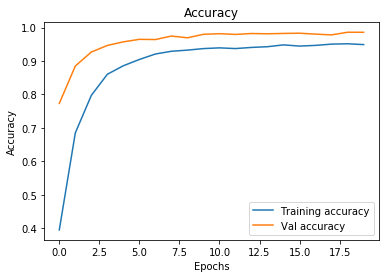

In [43]:
#Visualization of accuracy
plt.figure(0)
plt.plot(history.history['acc'],label='Training accuracy')
plt.plot(history.history['val_acc'],label='Val accuracy')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

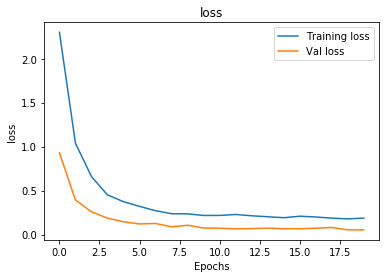

In [44]:
#Visualization of loss
plt.figure(0)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Val loss')
plt.title("loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# Testing on test data

In [61]:
def testing(testcsv):
    y_test=pd.read_csv(testcsv)
    label=y_test["ClassId"].values
    imgs=y_test["Path"].values
    print(imgs)
    data=[]
    for i in imgs:
        image=Image.open(cur_path +'\\Dataset\\' + i)
        image=image.resize((30,30))
        data.append(np.array(image))
    x_test=np.array(data)
    return x_test,label

In [62]:
x_test,label=testing("Dataset/Test.csv")

['Test/00000.png' 'Test/00001.png' 'Test/00002.png' ... 'Test/12627.png'
 'Test/12628.png' 'Test/12629.png']


In [63]:
y_pred=model.predict_classes(x_test)
y_pred

array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

# Accuracy of test data

In [65]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label,y_pred))

0.9496437054631829


Seems very good accuracy score

In [68]:
#Save the model as h5 extn
model.save("TSR.h5")

In [70]:
model

In [71]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Vehicle > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing vehicle > 3.5 tons' }

In [76]:
def test_on_img(img):
    data=[]
    image=Image.open(img)
    image=image.resize((30,30))
    data.append(np.array(image))
    x_test=np.array(data)
    y_pred=model.predict_classes(x_test)
    return image,y_pred

The predicted symbol is   Keep right


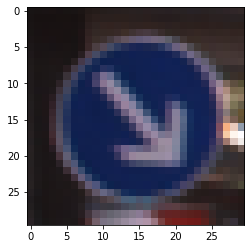

In [89]:
img,pred=test_on_img(r'C:/Users/Pramodh/Desktop/Pramodh/Phython/Phython Code practice/CNN/Traffic symbols classification\Dataset\Test\00005.png')
print('The predicted symbol is  ',classes[pred[0]])
plt.imshow(img)
plt.show()

We have achieved an amazing accuracy of 95 % approx. 
We can further improve accuracy by tuning hyperparameteres with Keras tuner and implementing data augmentation techniques.